## Sentiment Analysis

  This project is "Developing a Sentiment-Driven Product Recommendation and Sales Insight for E Commerce Using Machine Learning and Visualization Dashboard.". So, Sentiment is the key innovation that: improves the recommendation model, generates new sales & marketing insights and enhances dashboard storytelling. Sentiment analysis uses NLP to classify the opinion tone:
Postive,
Negative and 
Neutral.




#### Imprt required Libraries

In [1]:
# Install TextBlob if not done yet

# Import
import pandas as pd
from textblob import TextBlob


#### Upload Dataset

In [2]:
# Load the merged dataset (already joined: reviews + metadata)
cleaned_df = pd.read_csv('data/merged_cleaned_data.csv')

# Preview first rows
cleaned_df.head()


,rating,title,text,asin,parent_asin,user_id,helpful_vote,verified_purchase,cleaned_text,main_category,product_title,average_rating,rating_number,price,store,details
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,3,True,this review is more to clarify someone elses r...,Health & Personal Care,High Potency Magnesium Citrate Capsules 1000mg...,4.5,470,19.99,Life Nutrition,"Brand: Life Nutrition, Unit Count: 60 Count, F..."
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,3,True,love these easy multitasking bleach tablets be...,Health & Personal Care,Evolve Concentrated Bleach Tablets - 32-ct Bot...,4.8,181,19.99,Evolve,"Brand: Evolve, Scent: Fresh,Lemon, Product Ben..."
2,5,Fantastic,I have been suffering a couple months with hee...,B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,0,True,i have been suffering a couple months with hee...,Health & Personal Care,"Dr. Foot's Gel Heel Protectors, Plantar Fascii...",3.6,78,19.99,Dr.Foot,"Is Discontinued By Manufacturer: No, Product D..."
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,7,True,its cheap and it does what i wanted the massa...,Health & Personal Care,"Homedics Bubble Bliss Deluxe-Foot Spa, Heat Ma...",4.4,8312,19.99,Homedics,"Use for: Feet, Power Source: Corded Electric, ..."
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,0,True,didnt do a thing for me not saying they dont j...,Health & Personal Care,Brain Supplement 1053mg - Premium Nootropic Br...,4.1,94,19.99,Nature's Nutrition,"Brand: ""Natures Nutrition"", Unit Count: 180.00..."


#### Check Missing and Duplicate Values for Relation Dataset

In [3]:
# Missing values
print("Missing values per column:\n", cleaned_df.isnull().sum())
# Check duplicates
duplicates = cleaned_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing values per column:
 rating                  0
title                   0
text                    0
asin                    0
parent_asin             0
user_id                 0
helpful_vote            0
verified_purchase       0
cleaned_text          461
main_category           0
product_title           0
average_rating          0
rating_number           0
price                   0
store                   0
details              4980
dtype: int64
Number of duplicate rows: 0


In [4]:
# remove missing values
cleaned_df = cleaned_df.dropna()
print(f"Number of missing now: {cleaned_df.isnull().sum()}")

# Remove duplicate rows
cleaned_df = cleaned_df.drop_duplicates()
print(f"Number of duplicate now: {cleaned_df.duplicated().sum()}")




Number of missing now: rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
helpful_vote         0
verified_purchase    0
cleaned_text         0
main_category        0
product_title        0
average_rating       0
rating_number        0
price                0
store                0
details              0
dtype: int64
Number of duplicate now: 0


#### Sentiment Analysis Using TextBlob

This step is to define for sentiment analysis function by using TextBlob () object. TextBlob is an open-source Python library in processing textual data.
It will provide with a simple API for common natural language processing (NLP) tasks, such as: tokenization, sentiment analysis or part of speedch tagging. This project will use textBlob object for sentiment analysis because it can classify each review into positive, neutral, or negative, use these scores as numerical features in your recommendation system and quickly extract polarity scores from each review.

##### Defining Sentiment Label 

In [5]:
def get_sentiment(cleaned_text):
    # Create a TextBlob object
    blob = TextBlob(str(cleaned_text))
    # Get polarity: [-1.0, 1.0]
    polarity = blob.sentiment.polarity
    # Classify sentiment
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply function row by row
cleaned_df['sentiment'] = cleaned_df['cleaned_text'].apply(get_sentiment)

In [6]:
# Preview updated dataframe
cleaned_df[['cleaned_text', 'sentiment']].head(10)

# Check distribution
cleaned_df['sentiment'].value_counts()

sentiment
positive    313525
neutral     128088
negative     41720
Name: count, dtype: int64

##### Defining Sentiment Polarity Score

In [7]:
def get_polarity(cleaned_text):
    return TextBlob(str(cleaned_text)).sentiment.polarity

cleaned_df['polarity'] = cleaned_df['cleaned_text'].apply(get_polarity)
cleaned_df['polarity'] = cleaned_df['polarity'].round(3)

Polarity is a continuous numeric score in the range [-1.0, 1.0]:1 for negative, 0 for natural and 1 for postive. Polarity can be used as a numerical feature in your machine learning recommendation model.



In [8]:
# Preview
cleaned_df[['cleaned_text', 'sentiment', 'polarity']].head(10)

,cleaned_text,sentiment,polarity
0,this review is more to clarify someone elses r...,positive,0.232
1,love these easy multitasking bleach tablets be...,positive,0.307
2,i have been suffering a couple months with hee...,neutral,0.061
3,its cheap and it does what i wanted the massa...,neutral,-0.063
4,didnt do a thing for me not saying they dont j...,neutral,0.000
5,i have never been big on vitamins with the exc...,neutral,0.033
6,to be honest my husband did not use this for a...,positive,0.346
7,this is a nice basic sound machine i have used...,positive,0.211
8,this are super colorful great gift giving holi...,positive,0.510
9,i guess the only product i have in my history ...,positive,0.122


In [9]:
# Save
cleaned_df.to_csv('data/merged_with_sentiment_and_polarity.csv', index=False)
print("Saved file: merged_with_sentiment_and_polarity.csv")

Saved file: merged_with_sentiment_and_polarity.csv


#### Explority Data Analysis(EDA)


Exploratory Data Analysis (EDA) will be performed to gain an in-depth understanding of the review and product metadata datasets.  

In [10]:
# improt require liraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


##### show Dataset Summary

In [11]:
# Basic summary
cleaned_df.info()
cleaned_df.describe()

# Check for nulls
cleaned_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 483333 entries, 0 to 488766
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             483333 non-null  int64  
 1   title              483333 non-null  object 
 2   text               483333 non-null  object 
 3   asin               483333 non-null  object 
 4   parent_asin        483333 non-null  object 
 5   user_id            483333 non-null  object 
 6   helpful_vote       483333 non-null  int64  
 7   verified_purchase  483333 non-null  bool   
 8   cleaned_text       483333 non-null  object 
 9   main_category      483333 non-null  object 
 10  product_title      483333 non-null  object 
 11  average_rating     483333 non-null  float64
 12  rating_number      483333 non-null  int64  
 13  price              483333 non-null  float64
 14  store              483333 non-null  object 
 15  details            483333 non-null  object 
 16  sentime

rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
helpful_vote         0
verified_purchase    0
cleaned_text         0
main_category        0
product_title        0
average_rating       0
rating_number        0
price                0
store                0
details              0
sentiment            0
polarity             0
dtype: int64

##### Visualize Missing Values

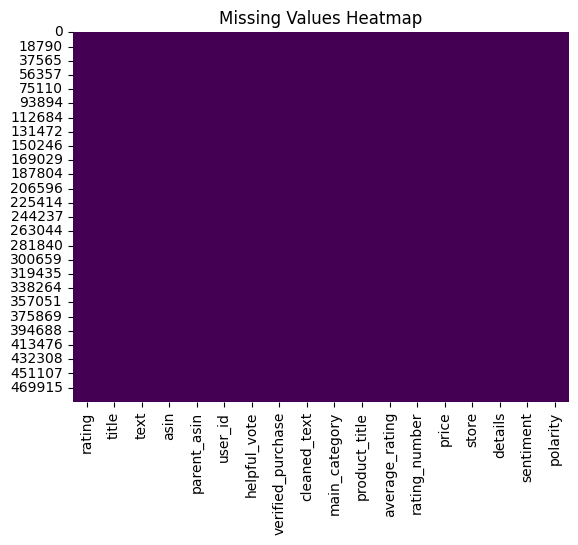

In [12]:
# Visualize missing values
sns.heatmap(cleaned_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

##### Correlation for selected features only

Correlation Matrix:
                    price  rating_number  average_rating  polarity
price           1.000000       0.006941        0.025656 -0.004794
rating_number   0.006941       1.000000        0.210667  0.005069
average_rating  0.025656       0.210667        1.000000  0.187836
polarity       -0.004794       0.005069        0.187836  1.000000


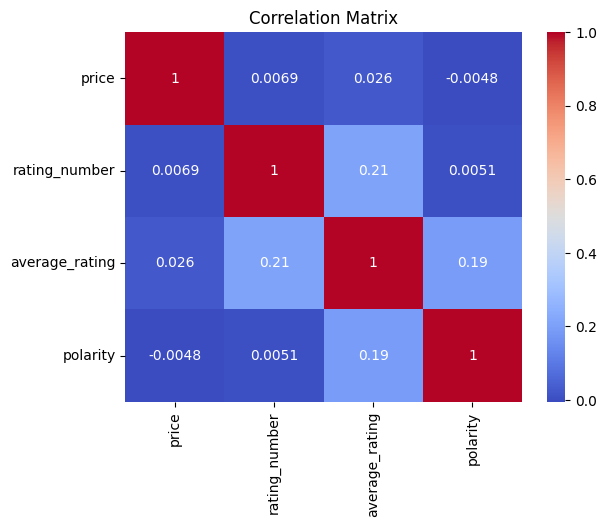

In [13]:
import seaborn as sns

# Correlation matrix: Price, Rating, Polarity
corr = cleaned_df[['price', 'rating_number', 'average_rating', 'polarity']].corr()
print("Correlation Matrix:\n", corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Correlation analysis was also conducted to explore relationships among variables like price, average rating, rating number, and sentiment polarity. These findings informed the subsequent machine learning modeling and dashboard development.

#### Data Visualization

##### Rating Distribution

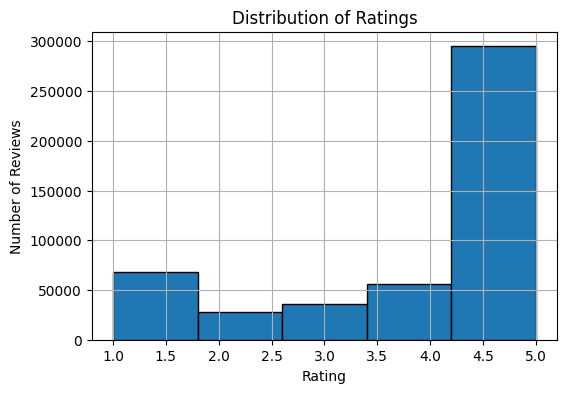

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
cleaned_df['rating'].hist(bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()


##### Sentiment Distribution

sentiment
positive    313525
neutral     128088
negative     41720
Name: count, dtype: int64


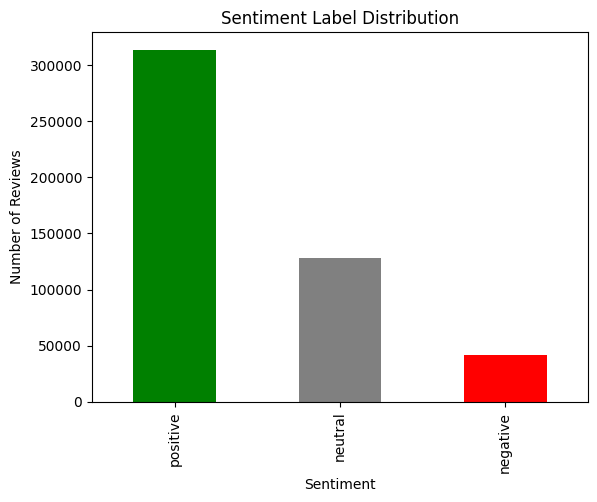

In [15]:
# Count sentiment labels
sentiment_counts = cleaned_df['sentiment'].value_counts()
print(sentiment_counts)

# Plot
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()




##### Average Rating and Sentiment

C:\Users\User\AppData\Local\Temp\ipykernel_33768\2816444452.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='average_rating', data=cleaned_df, palette='Pastel1')


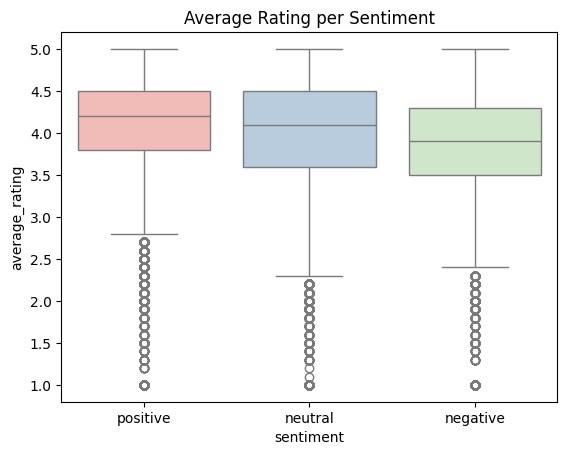

In [16]:
sns.boxplot(x='sentiment', y='average_rating', data=cleaned_df, palette='Pastel1')
plt.title("Average Rating per Sentiment")
plt.show()


##### Polarity and Price

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


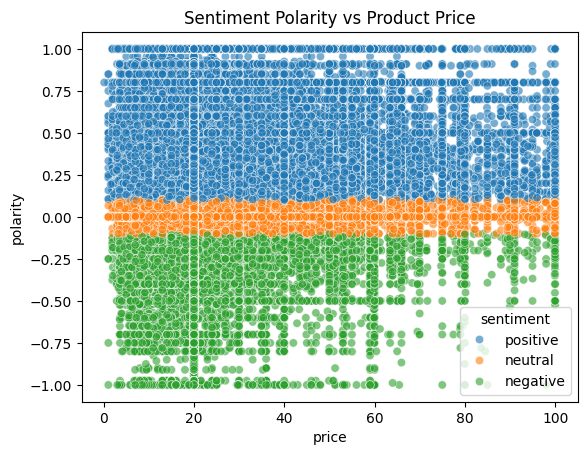

In [17]:
sns.scatterplot(data=cleaned_df[cleaned_df['price'] < 100], x='price', y='polarity', hue='sentiment', alpha=0.6)
plt.title("Sentiment Polarity vs Product Price")
plt.show()


##### Number of Reviews and Sentiment

C:\Users\User\AppData\Local\Temp\ipykernel_33768\3287155339.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='rating_number', data=cleaned_df, palette='Pastel1')


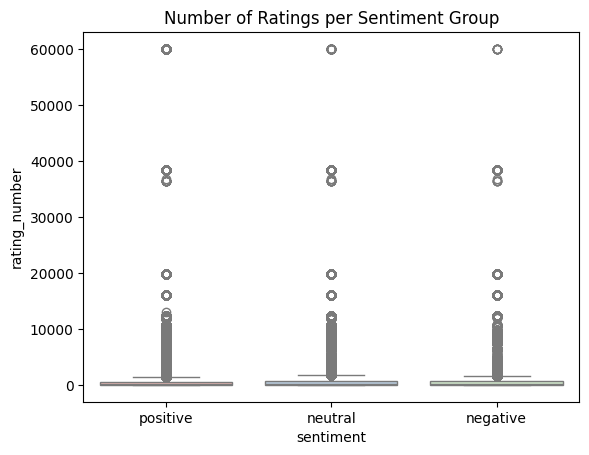

In [18]:
sns.boxplot(x='sentiment', y='rating_number', data=cleaned_df, palette='Pastel1')
plt.title("Number of Ratings per Sentiment Group")
plt.show()


##### Top Products by Sentiment

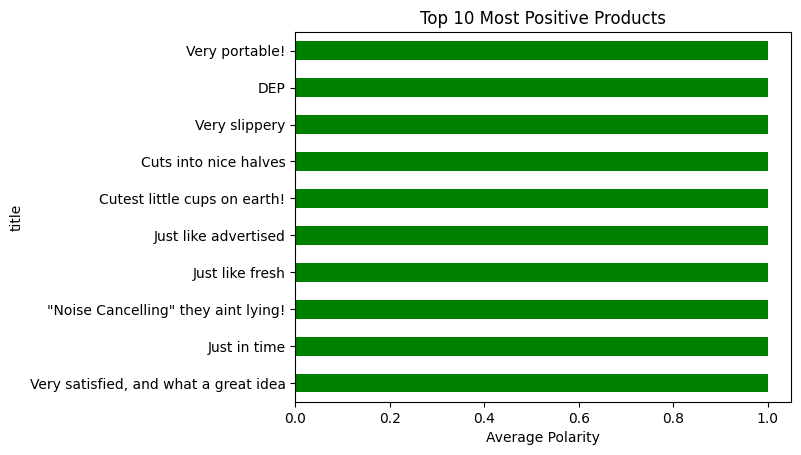

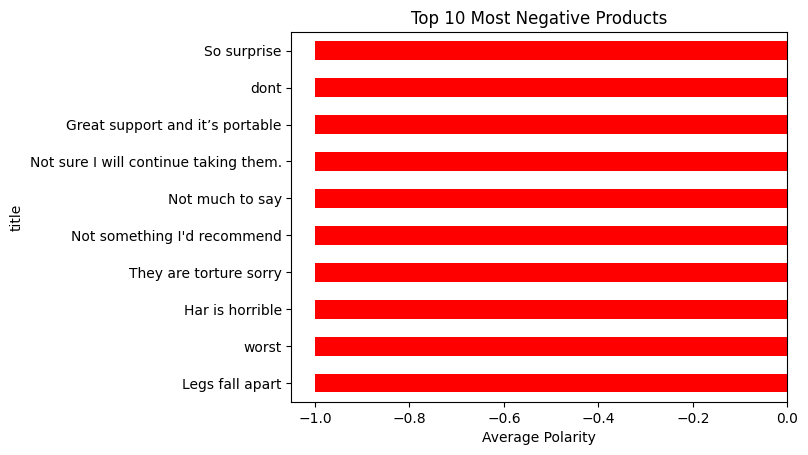

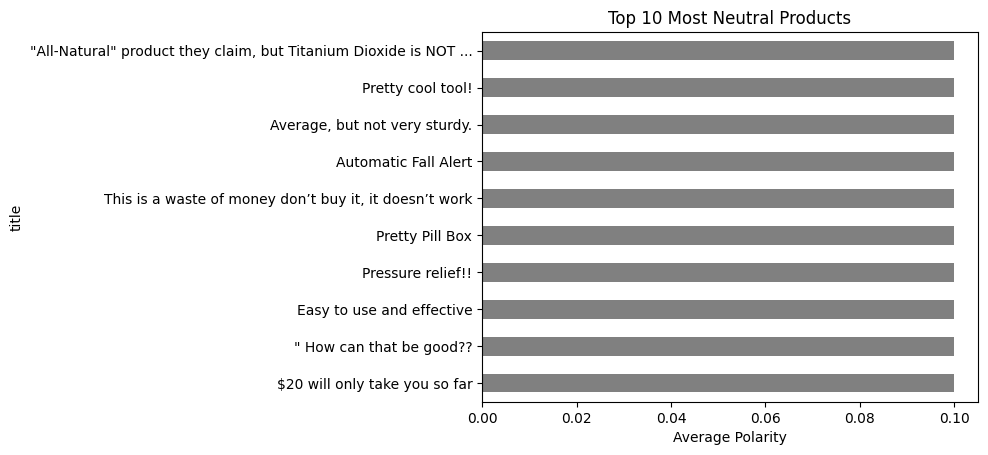

In [19]:
# Group by product and get average polarity
top_positive = cleaned_df[cleaned_df['sentiment'] == 'positive'].groupby('title')['polarity'].mean().sort_values(ascending=False).head(10)
top_negative = cleaned_df[cleaned_df['sentiment'] == 'negative'].groupby('title')['polarity'].mean().sort_values().head(10)
top_neutral = cleaned_df[cleaned_df['sentiment'] == 'neutral'].groupby('title')['polarity'].mean().sort_values(ascending=False).head(10)

# Plot Positive
top_positive.plot(kind='barh', color='green')
plt.title("Top 10 Most Positive Products")
plt.xlabel("Average Polarity")
plt.show()

# Plot Negative
top_negative.plot(kind='barh', color='red')
plt.title("Top 10 Most Negative Products")
plt.xlabel("Average Polarity")
plt.show()

# Plot Neutral
top_neutral.plot(kind='barh', color='gray')
plt.title("Top 10 Most Neutral Products")
plt.xlabel("Average Polarity")
plt.show()

##### overall distribution of sentiment labels

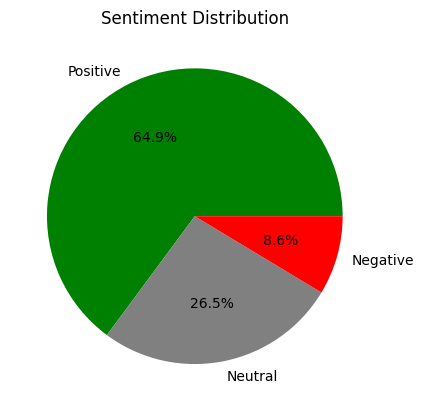

In [20]:
cleaned_df['sentiment'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', colors=['green', 'gray', 'red'], 
    labels=['Positive', 'Neutral', 'Negative'], 
    title='Sentiment Distribution'
)
plt.ylabel("")  # Remove y-label
plt.show()


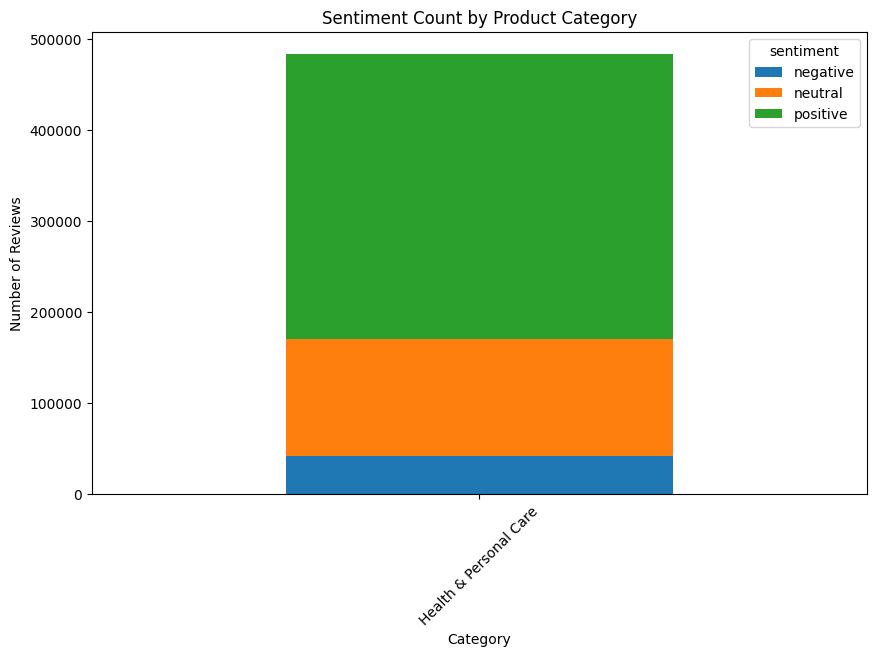

In [21]:
sentiment_counts = cleaned_df.groupby(['main_category', 'sentiment']).size().unstack().fillna(0)
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Sentiment Count by Product Category")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()
